 Importing nessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Diwali sales data.csv")
df           

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [3]:
df.shape

(11251, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


Checking mising data

In [5]:
df.isna().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

## Data Cleaning

In [6]:
#As status and unnamed1 is Null
df = df.drop(['Status','unnamed1'], axis= 1)
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [7]:
#custom methods file containg data cleaning function
from methods import catconsep
cat, con = catconsep(df)

In [8]:
cat

['Cust_name',
 'Product_ID',
 'Gender',
 'Age Group',
 'State',
 'Zone',
 'Occupation',
 'Product_Category']

In [9]:
con

['User_ID', 'Age', 'Marital_Status', 'Orders', 'Amount']

In [10]:
from methods import replacer
replacer(df)

In [11]:
 df.isna().sum() #Clean data with zero null values

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [12]:
# changing df['Amount'] data type from Float to int
df['Amount'] = df['Amount'].astype(int)
df['Amount'].dtype

dtype('int32')

In [13]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [14]:
#rename columns **(does not save)
df.rename(columns={'Marital_Status': 'Shadi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [15]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11251.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.609901
std,1.716125e+03,12.754122,0.493632,1.115047,5219.569169
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.500000
50%,1.003065e+06,33.000000,0.000000,2.000000,8110.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12671.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


# Exploratory data Analysis

#### Gender

In [16]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

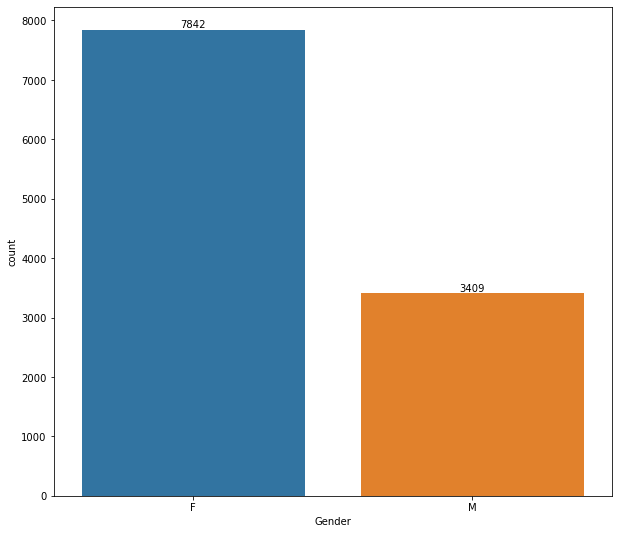

In [17]:
plt.figure(figsize= (10,9))
ax = sns.countplot(x = 'Gender', data = df )

for bars in ax.containers:
    ax.bar_label(bars)

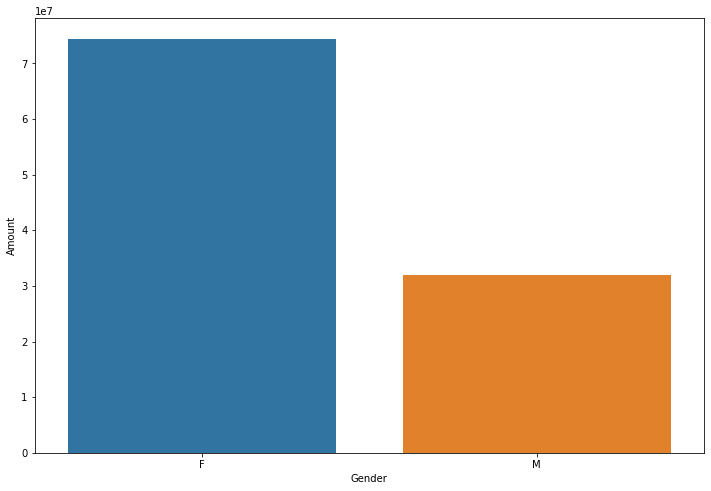

In [18]:
sales_gender = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.figure(figsize=(12,8))
ax = sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gender)

#for bar in ax.containers:
#    ax.bar_label(bar)

By far Females spend the most amount of money

#### Age

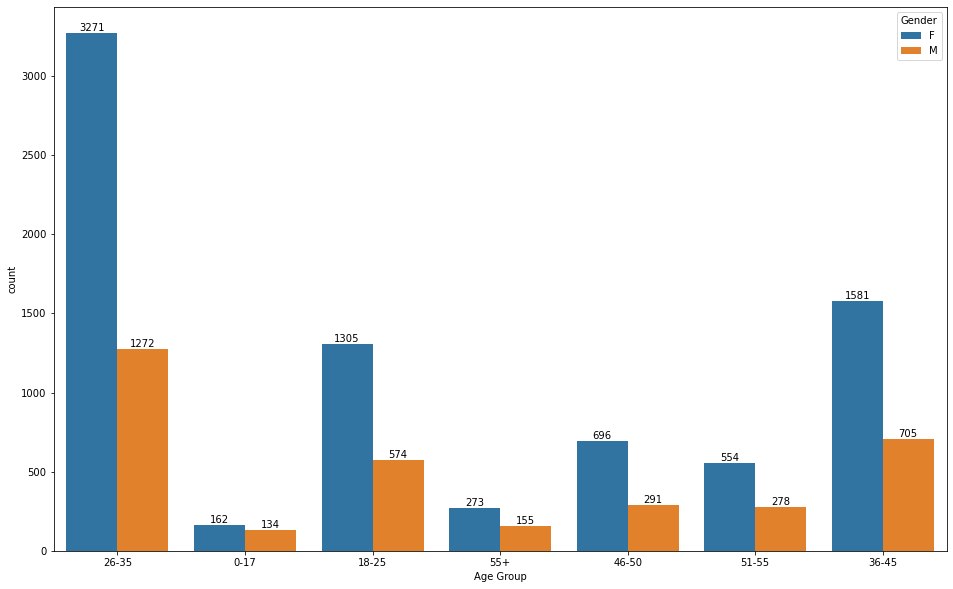

In [19]:
plt.figure(figsize=(16,10))
ax = sns.countplot(data = df, x = 'Age Group', hue= 'Gender')

for bar in ax.containers:
    ax.bar_label(bar)

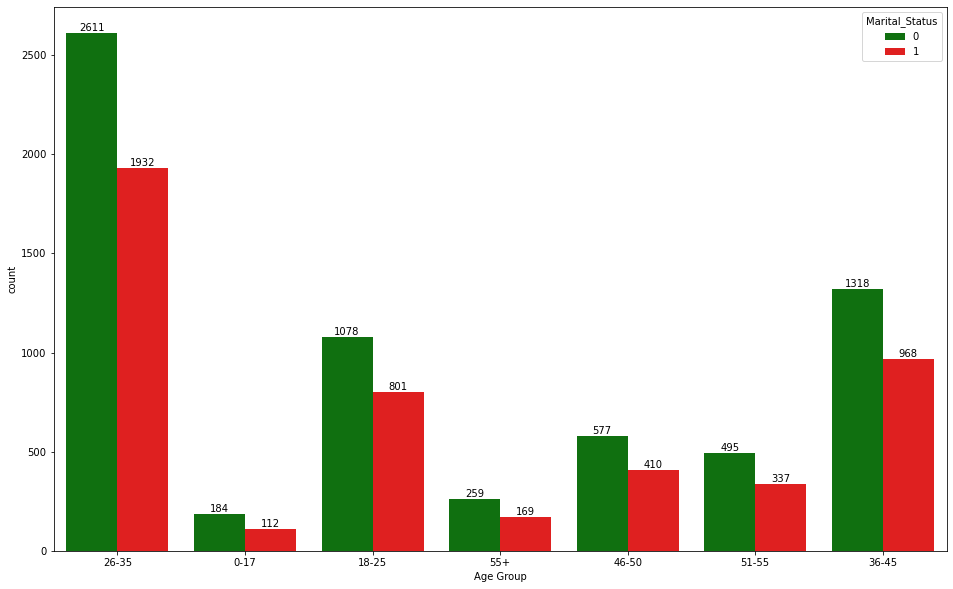

In [20]:
plt.figure(figsize=(16,10))
ax = sns.countplot(data = df, x = 'Age Group', hue= 'Marital_Status', palette={0: 'green', 1: 'red'})

for bar in ax.containers:
    ax.bar_label(bar)

<AxesSubplot:xlabel='Age Group', ylabel='Amount'>

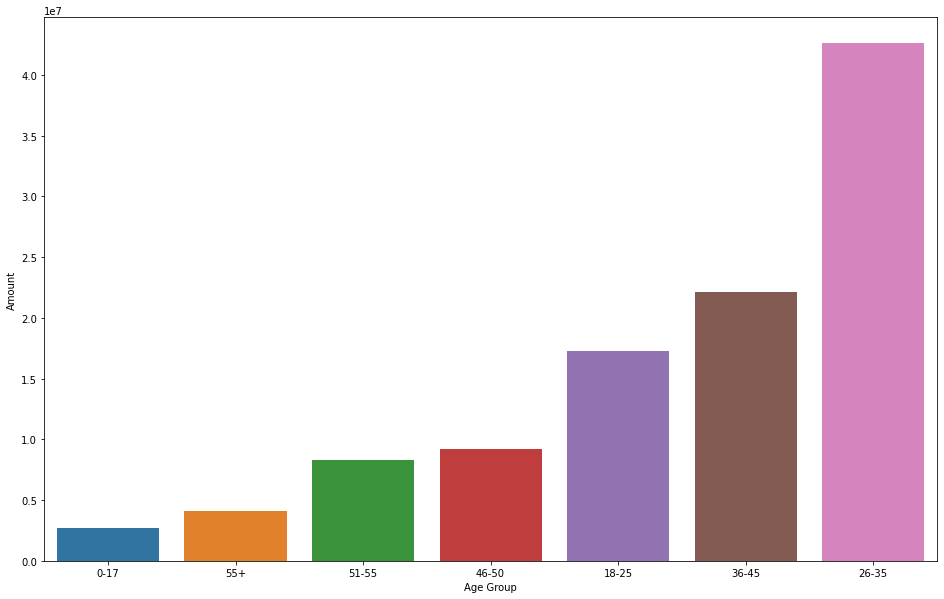

In [21]:
# Total amount vs age group
sale_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending = True)
plt.figure(figsize=(16,10))
sns.barplot(x = 'Age Group', y = 'Amount', data = sale_age)

Most purchases are held by Females as well as we can conclude that most are in the age group of 26-35 

#### State

In [22]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<AxesSubplot:xlabel='State', ylabel='Orders'>

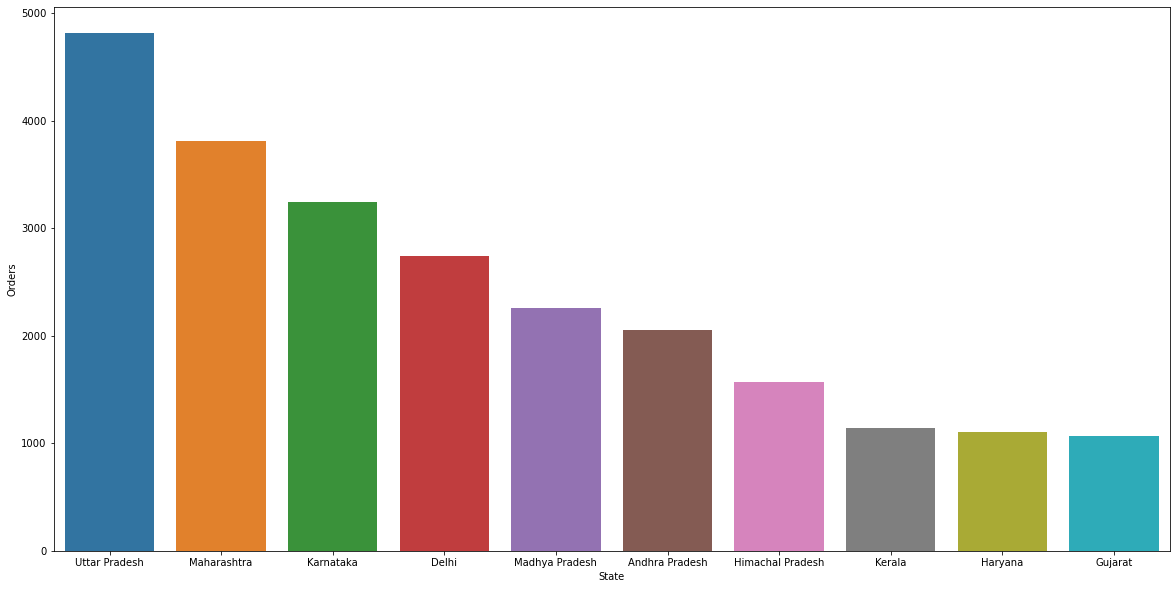

In [34]:
plt.figure(figsize=(20,10))
state_data = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)
sns.barplot(x = 'State', y = 'Orders' , data = state_data )

<AxesSubplot:xlabel='State', ylabel='Amount'>

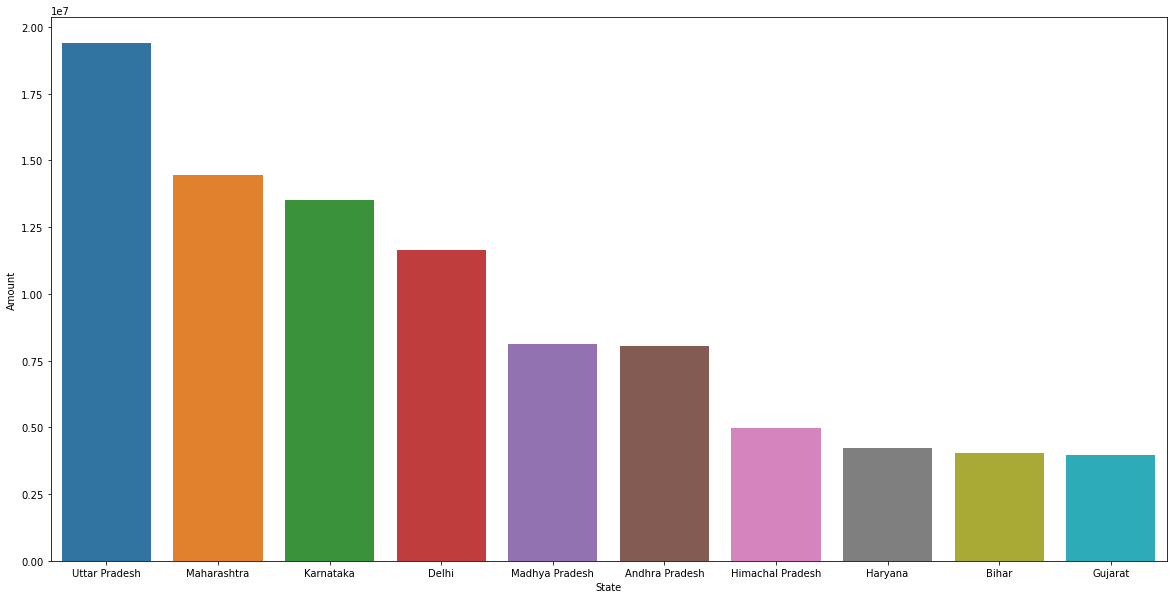

In [42]:
plt.figure(figsize=(20,10))
state_data = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)
sns.barplot(x = 'State', y = 'Amount' , data = state_data )

Form the above data most orders and most amount of money spend are by Uttar Pradesh, Maharashtra and Karnataka respectively

#### Maritial status

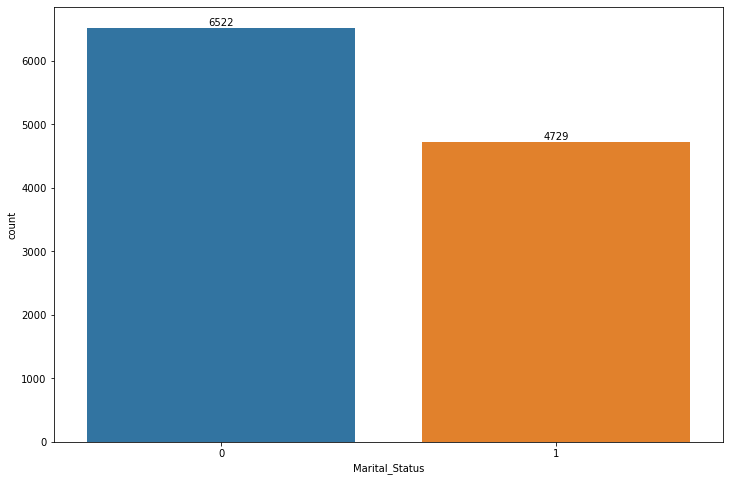

In [46]:
plt.figure(figsize=(12,8))

xn = sns.countplot(x = 'Marital_Status', data = df)

for bar in xn.containers:
    xn.bar_label(bar)

<AxesSubplot:xlabel='Marital_Status', ylabel='Amount'>

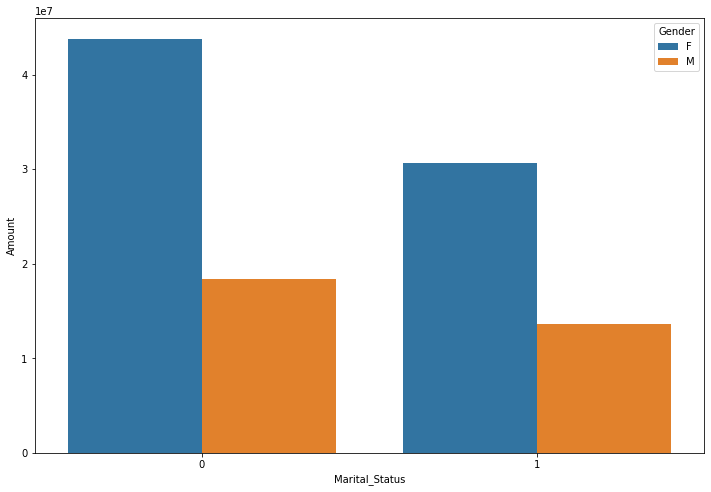

In [51]:
#marital spending

mar = df.groupby(['Marital_Status', 'Gender'], as_index= False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

plt.figure(figsize=(12,8))
sns.barplot(x = 'Marital_Status', y = 'Amount', data = mar, hue = 'Gender')

From the above data we can conclude that most of the amount spend by female and are unmarried

#### Occupation

In [52]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

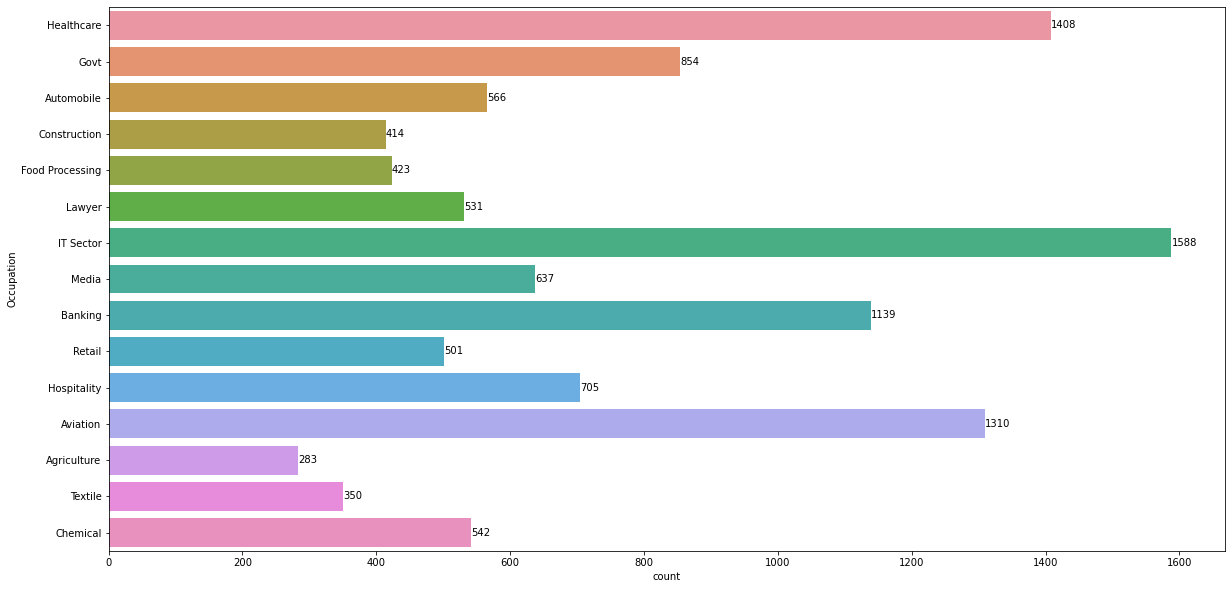

In [77]:
plt.figure(figsize=(20,10))
dx = sns.countplot(y = 'Occupation',  data = df)

for bar in dx.containers:
    dx.bar_label(bar)

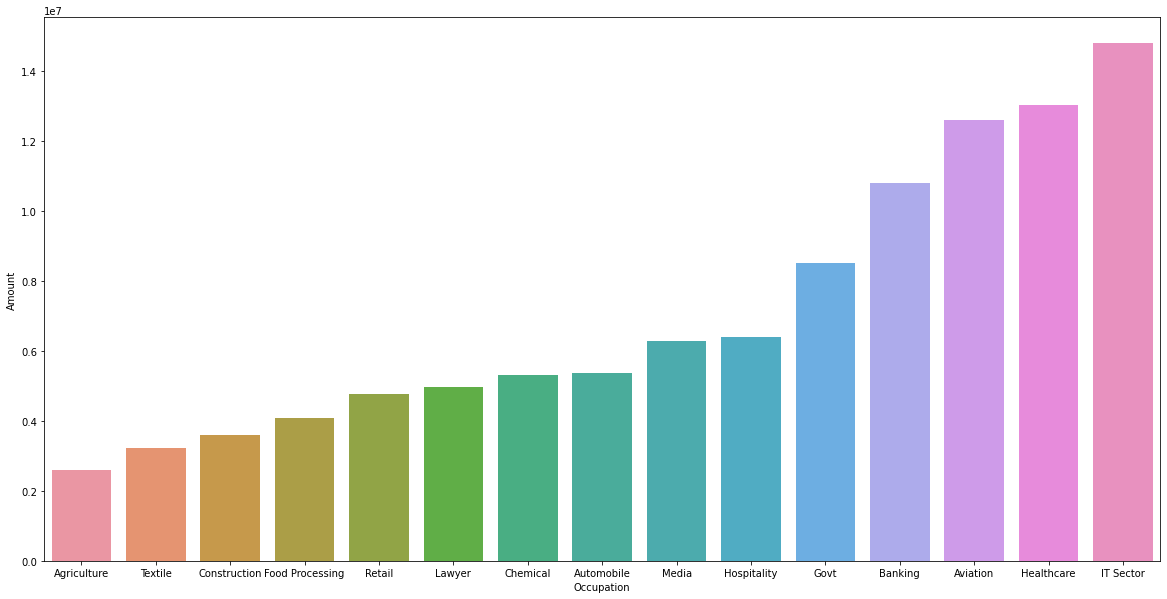

In [88]:
occ = df.groupby('Occupation', as_index= False)['Amount'].sum().sort_values(by = 'Amount')
plt.figure(figsize=(20,10))

dx = sns.barplot(x = 'Occupation',y = 'Amount' , data = occ)


Most of the buyers are from IT sector, Healthcare, Aviation

#### Product Category

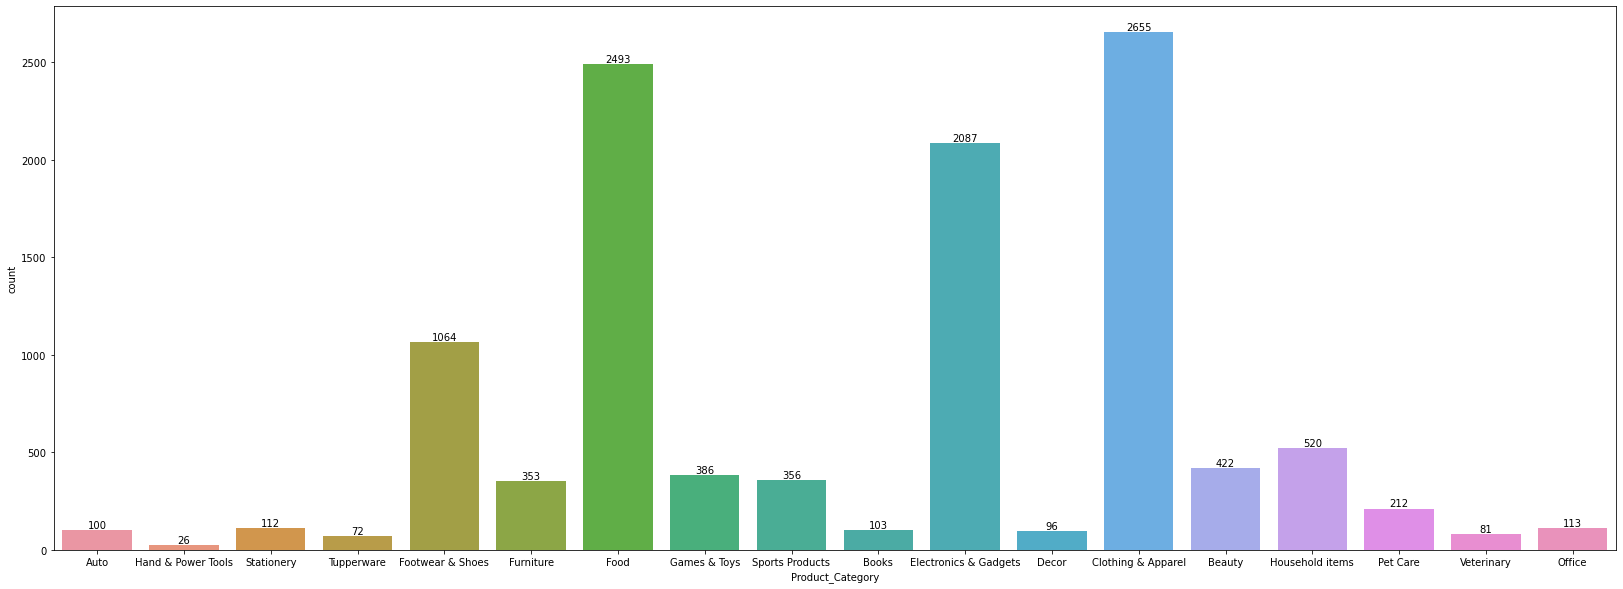

In [99]:
plt.figure(figsize=(28,10))

dx = sns.countplot(x = 'Product_Category',  data = df)

for bar in dx.containers:
    dx.bar_label(bar)

<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

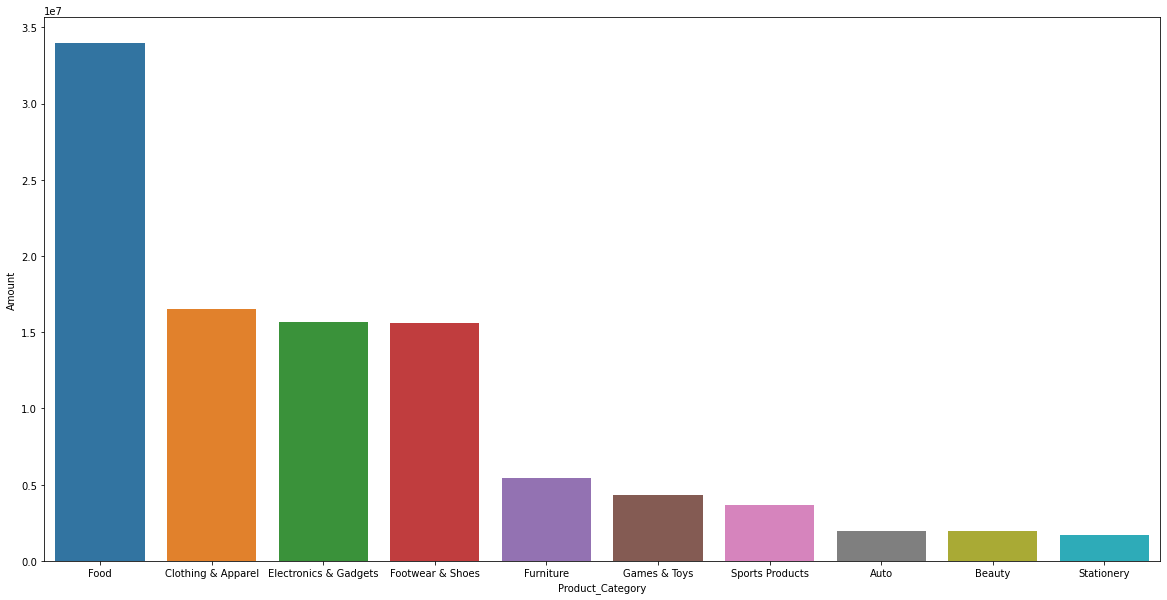

In [104]:
plt.figure(figsize=(20,10))
pc = df.groupby('Product_Category', as_index= False)['Amount'].sum().sort_values(by= 'Amount', ascending = False).head(10)
sns.barplot(x = 'Product_Category', y = 'Amount', data = pc)

## Conclusion

Unmarried Women from age group of 25-35 from UP, Maharashtra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products Food, Clothing and Electronic category

## Multiple Linear Regression

In [199]:
X = df[['Age Group','Age','Gender','Occupation', 'State','Product_Category', 'Marital_Status']]#
Y = df[['Amount']]

In [200]:
from methods import preprocessing
Xnew = preprocessing(X)
Xnew

,Age,Marital_Status,Age Group_0-17,Age Group_18-25,Age Group_26-35,Age Group_36-45,Age Group_46-50,Age Group_51-55,Age Group_55+,Gender_F,...,Product_Category_Furniture,Product_Category_Games & Toys,Product_Category_Hand & Power Tools,Product_Category_Household items,Product_Category_Office,Product_Category_Pet Care,Product_Category_Sports Products,Product_Category_Stationery,Product_Category_Tupperware,Product_Category_Veterinary
0,-0.581893,-0.851519,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,-0.033027,1.174372,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,-0.033027,1.174372,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,-1.522807,-0.851519,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.581893,1.174372,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,-1.287579,1.174372,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
11247,-0.189846,-0.851519,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11248,0.359021,-0.851519,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
11249,0.123792,-0.851519,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [201]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(Xnew, Y , test_size=0.2, random_state= 31)

In [202]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [203]:
lin_reg.fit(xtrain, ytrain)

LinearRegression()

In [204]:
lin_reg.score(xtest, ytest)

0.644487654973191

In [205]:
y_pred= lin_reg.predict(xtest)
y_pred

array([[ 2220.],
       [13679.],
       [ 7584.],
       ...,
       [ 7950.],
       [13544.],
       [14883.]])

In [206]:
from sklearn.metrics import r2_score
r2_score(ytest,y_pred)

0.644487654973191